# Lead Scoring Case Study

## Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

## Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

First import NumPy and Pandas and read the dataset

In [1]:
#Let's first suppress the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's import all the required packages/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

%matplotlib inline

In [3]:
#Let's now load the dataset.

leadInfo = pd.read_csv('Leads.csv', encoding = 'latin')
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's inspect leadInfo dataframe

print("*********************************  Info *******************************************") 
print(leadInfo.info())
print("*********************************  Shape ******************************************") 
print(leadInfo.shape)
print("**************************** Columns having null values *****************************")
print(leadInfo.isnull().any())
print("**************************** Describe *****************************")
leadInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning

As we can see from the leads dataset, there are some 'select' values where no option is selected by lead which needs to be replcaed by 'NaN'.

In [5]:
#Let's now Replace 'select' with NaN (Since it means no option is selected)
leadInfo = leadInfo.replace('Select',np.nan)

In [6]:
#Now, let's check if 'select' values are replaced with 'NaN'.
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#Let's check for dupliactes if any.
leadInfo[leadInfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


As we can see that, there are no duplicates found in leads dataset.

In [8]:
#Let's check percentage of null values in each column
null_percent = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see that, there are some columns with more than 30% null values.

In [9]:
#Now let's Remove all the columns with above 30% null values
leadInfo = leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [10]:
#Since, we have dropped columns with more than 30% null values, let's check for percentage of null values again.
null_percent = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As we can see that, there are still few columns which have null values. Let's first check if these values needs to be removed or imputed.

In [11]:
# Let's check the value counts for each values in the 'Country' column.
leadInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [12]:
#As we can see that, India has highest value counts, let's check the percentage of India Value
country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
print(country_percentage)

70.26


As we can see that, there are 70% values present as "India" in the Country column. Also, as we have seen earlier that Country column has around 27% missing values. Hence, we can drop the Country Column.

In [13]:
leadInfo = leadInfo.drop(['Country'], axis=1)

In [14]:
#Now let's check the value counts for each values in the 'Lead Source'
leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

As we can see that, the value "Google" has highest value counts and is present in both Uppercase as well as lowercase. 
Hence, we need to impute the null values with "Google".

In [15]:
#Let's impute the null values and lowercase "google" values with "Google".
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')

In [16]:
#Now let's check the value counts for each values in the 'Total Visits'
leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

As we can see that, TotalVisits 0 has the highest value counts which is a missing value. Hence, let's check median of TotalVisits column.

In [17]:
#Let's check the median of 'TotalVisits' column 
leadInfo['TotalVisits'].median()

3.0

In [18]:
#Now let's impute the null values in 'TotalVisits' column by the median value 3.
leadInfo['TotalVisits'] = leadInfo['TotalVisits'].replace(np.nan, leadInfo['TotalVisits'].median())

In [19]:
#Now let's check the value counts for each values in the 'Page Views Per Visit'
leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [20]:
#Let's check the median of the column 'Page Views Per Visit as well'.
leadInfo['Page Views Per Visit'].median()

2.0

In [21]:
#Here, we can impute the null values in 'Page Views Per Visit' by the median value 2.
leadInfo['Page Views Per Visit'] = leadInfo['Page Views Per Visit'].replace(np.nan, leadInfo['Page Views Per Visit'].median())

In [22]:
#Let's check the value counts for the column 'Last Activity'
leadInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

As we can see that, here since we do not have any information about the last activity of the customer, hence, we can add a new category 
'No Data Found' for the null values

In [23]:
#Let's impute null values in 'Last Activity' Column by 'No Data Found'.
leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(np.nan, 'No Data Found')

In [24]:
# Check the value counts for the column 'What is your current Occupation'.
leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

As we can see that, there is no information about current occupation, we can impute null values by 'No Information'

In [25]:
#Let's impute null values in 'What is your current occupation' Column by 'No Data Found'.
leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [26]:
# Check the value counts for the column What matters most to you in choosing a course 
leadInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
matters_most_percentage = round(100*len(leadInfo[leadInfo['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(leadInfo['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


As we can see that, Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column.
Also, the column also has around 29% as null valuees.
Hence, we should drop this column.

In [28]:
#Let's drop 'What matters most to you in choosing a course' Column.
leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [29]:
#Now let's check for the percentage of null values in each column
percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been dropped or imputed the columns which have more than 70% data concentrated towards one value.

Also, as we have seen earlier, there are few columns which have "No" as its value. Hence, we can drop these columns.

In [30]:
#Let's drop columns which have only "No" as its value.
leadInfo = leadInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [31]:
leadInfo.shape

(9240, 20)

## OUTLIER

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

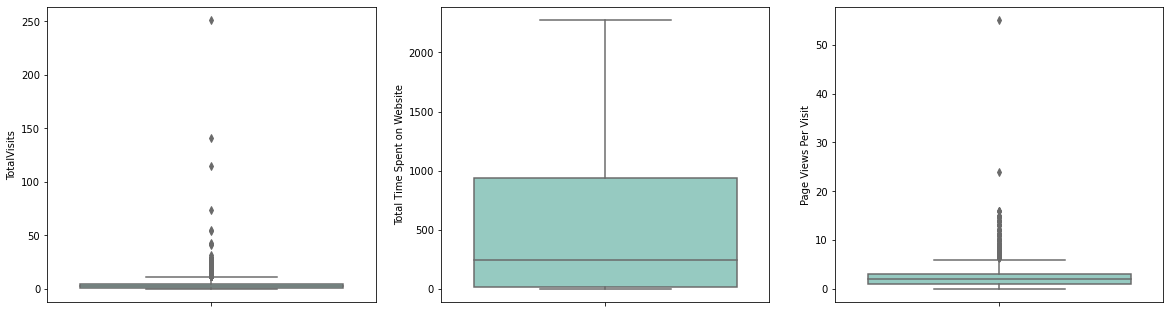

In [33]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadInfo)
plt.show()

In [34]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leadInfo['TotalVisits'].quantile(0.99)
leadInfo = leadInfo[leadInfo["TotalVisits"] < nn_quartile_total_visits]
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [35]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [36]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leadInfo['Page Views Per Visit'].quantile(0.99)
leadInfo = leadInfo[leadInfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [37]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [38]:
# Determine the percentage of data retained

num_data = round(100*(len(leadInfo)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

# Step 3: Exploratory Data Analysis


Let us try and understand the data now based on each columns effect on the conversion rates

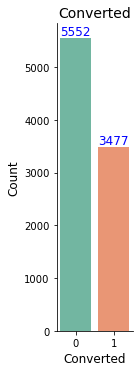

In [39]:
# Conversion Rate 
plot = sns.catplot(x="Converted", kind="count", data=leadInfo, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, the overall conversion rate is around 39%.

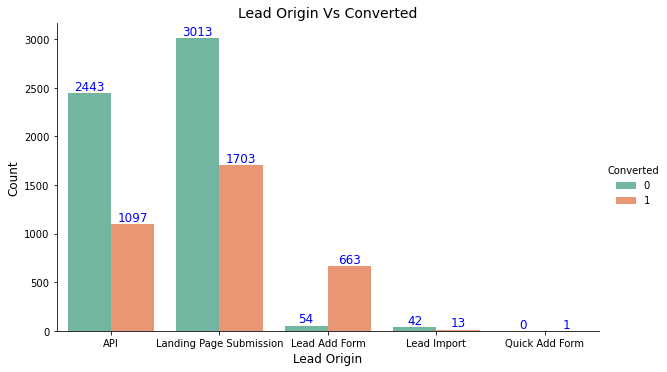

In [40]:
# Lead Origin
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, Landing Page Submission has maximum conversion whereas, there is only one lead from Quick Add Form which got converted.

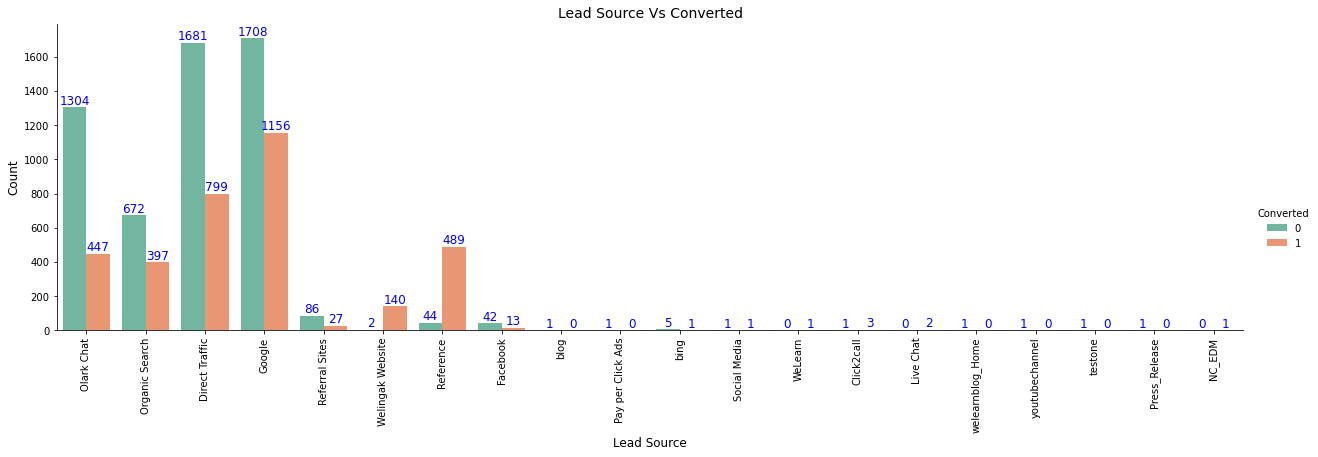

In [41]:
# Lead Source
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, we can see that the major conversion in the lead source is from Google.

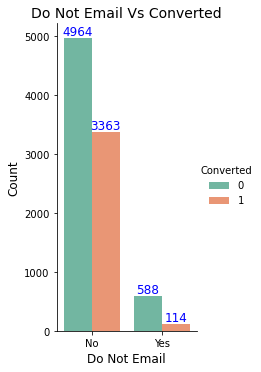

In [42]:
# Do not Email
plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As we can see, the major conversion has been done through emails.

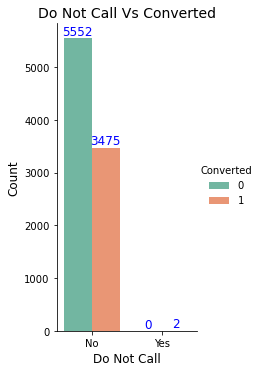

In [43]:
# Do not Call
plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As we can see, the major conversions were done through Calls. Also, 2 leads who opted for ‘Do Not Call’, still got converted.

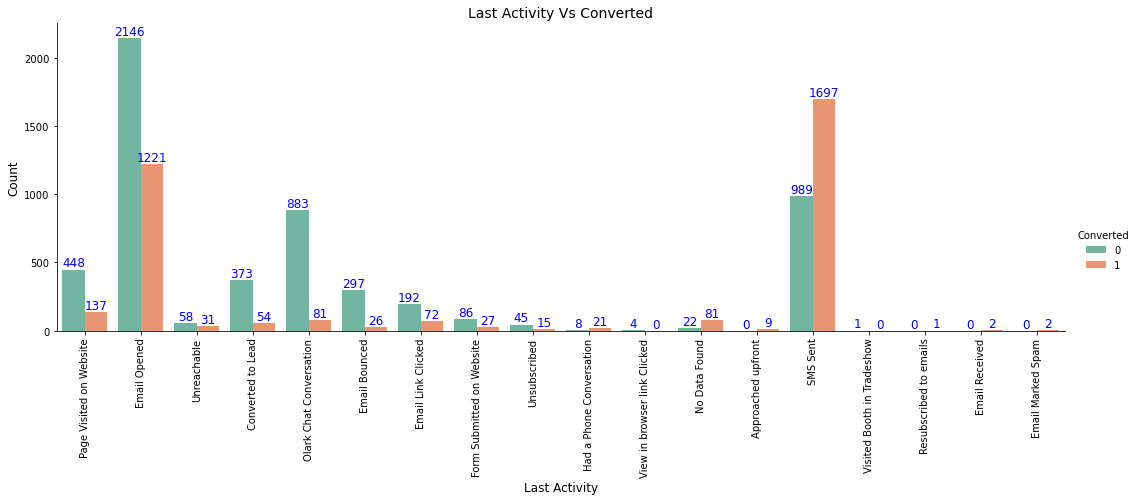

In [44]:
# Last Activity
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, the Last Activity value of 'SMS Sent' had more conversion.

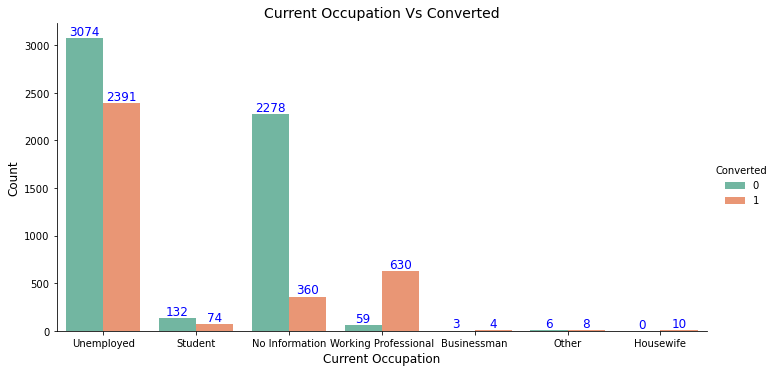

In [45]:
# What is your current occupation
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadInfo, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that - Out of 7 business men, 4 got converted - Out 10 housewives, all 10 leads got converted.

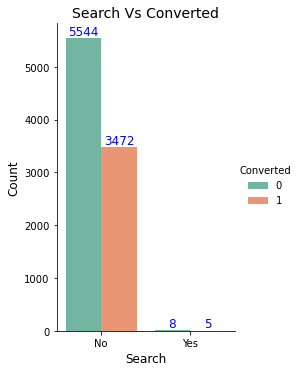

In [46]:
# Search
plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

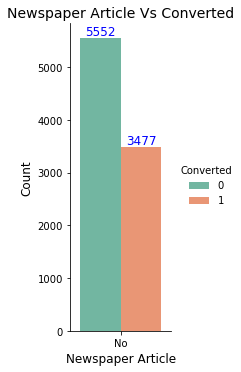

In [47]:
# Newspaper Article
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [48]:
#Let's drop Newspaper Article
leadInfo = leadInfo.drop(['Newspaper Article'], axis=1)

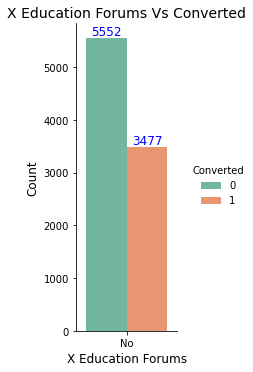

In [49]:
# X Education Forums
plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [50]:
#Let's drop X Education Forum column
leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

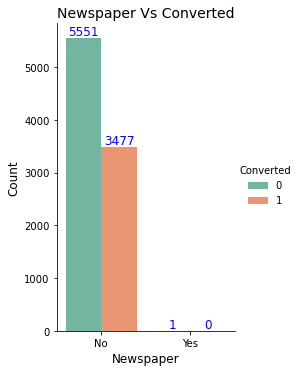

In [51]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [52]:
# Let's drop Newspaper column
leadInfo = leadInfo.drop(['Newspaper'], axis=1)

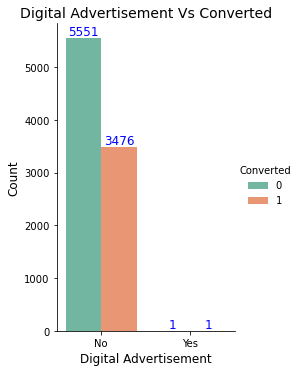

In [53]:
# Digital Advertisement
plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

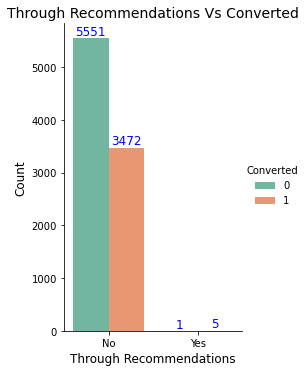

In [54]:
#Through Recommendations
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

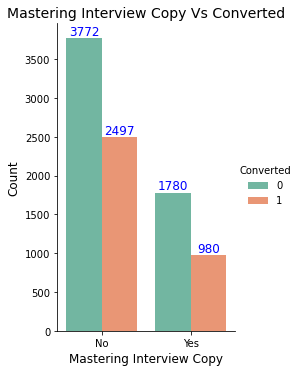

In [55]:
#A free copy of Mastering The Interview
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

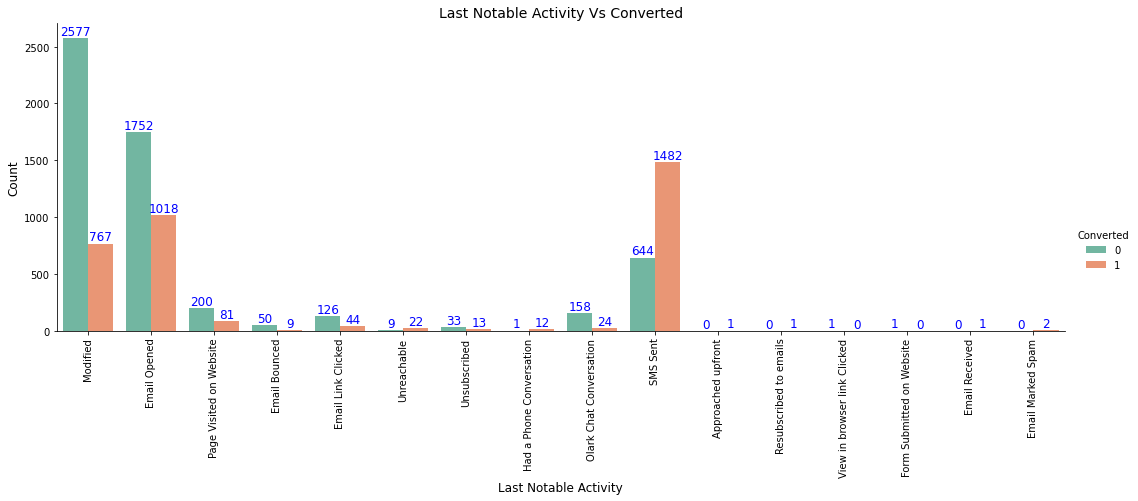

In [56]:
#Last Notable Activity
plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts
ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

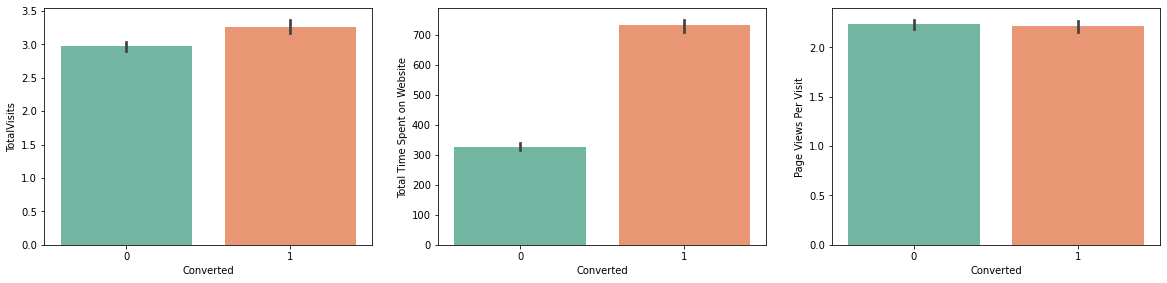

In [57]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()


The conversion rates seem high for Total Visits, Total Time Spent on Website, and Page Views Per Visit.

# Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [58]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)

In [59]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(leadInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leadInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leadInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leadInfo['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leadInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_notable_activity1], axis=1)

leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leadInfo = leadInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [61]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [62]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [63]:
# check shape of the data frame

leadInfo.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

# Step 5: Test-Train Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Step 6: Rescaling the features with MinMax Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [69]:
### Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

38.50924797873519

## We have almost 39% conversion rate

# Step 7: Model Building

Assessing the model with StatsModels

## Running the Initial Training Model

In [70]:
import statsmodels.api as sm

In [71]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 Jan 2023   Deviance:                   1.4110e+05
Time:                        22:37:13   Pearson chi2:                 6.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             7.985e+14    6.4e+07   1.25e+07      0.000    7.99e+14    7.99e+14
Do Not Email                                     -5.058e+14   4.48e+06  -1.13e+08      0.000   -5.06e+14   -5.06e+14
Do Not Call                                       2.033e+15   4.76e+07   4.27e+07      0.000    2.03e+15    2.03e+15
TotalVisits                                      -5.288e+14   7.66e+06  -6.91e+07      0.000   -5.29e+14   -5.29e+14
Total Time Spent on Website                       3.408e+15   4.01e+06   8.49e+08      0.000    3.41e+15    3.41e+15
Page Views Per Visit                               4.46e+13   6.53e+06   6.83e+06      0.000    4.46e+13    4.46e+13
Search                                           -3.836e+14   2.44e+07  -1.57e+07      0.000   -3.84e+14   -3.84e+14
Digital Advertisement                             2.206e+14   4.76e+07   4.64e+06      0.000    2.21e+14    2.21e+14
Through Recommendations                          -3.923e+14    4.2e+07  -9.33e+06      0.000   -3.92e+14   -3.92e+14
A free copy of Mastering The Interview           -6.738e+13   2.69e+06   -2.5e+07      0.000   -6.74e+13   -6.74e+13
LeadOrigin_API                                   -2.461e+15   6.74e+07  -3.65e+07      0.000   -2.46e+15   -2.46e+15
LeadOrigin_Landing Page Submission               -2.293e+15   6.74e+07   -3.4e+07      0.000   -2.29e+15   -2.29e+15
LeadOrigin_Lead Add Form                         -9.059e+14   6.86e+07  -1.32e+07      0.000   -9.06e+14   -9.06e+14
LeadOrigin_Lead Import                           -2.285e+15   8.27e+07  -2.76e+07      0.000   -2.28e+15   -2.28e+15
LeadSource_Click2call                             4.057e+15   4.69e+07   8.66e+07      0.000    4.06e+15    4.06e+15
LeadSource_Direct Traffic                         6.469e+14   1.17e+07   5.54e+07      0.000    6.47e+14    6.47e+14
LeadSource_Facebook                               5.366e+14   4.62e+07   1.16e+07      0.000    5.37e+14    5.37e+14
LeadSource_Google                                 9.271e+14   1.15e+07   8.05e+07      0.000    9.27e+14    9.27e+14
LeadSource_Live Chat                              4.689e+15   4.67e+07      1e+08      0.000    4.69e+15    4.69e+15
LeadSource_Olark Chat                             4.144e+14   1.18e+07    3.5e+07      0.000    4.14e+14    4.14e+14
LeadSource_Organic Search                         8.231e+14   1.18e+07   6.99e+07      0.000    8.23e+14    8.23e+14
LeadSource_Pay per Click Ads                        -2.9526    1.9e-07  -1.55e+07      0.000      -2.953      -2.953
LeadSource_Press_Release                             0.6700   2.85e-07   2.35e+06      0.000       0.670       0.670
LeadSource_Reference                     

Generalized Linear Model Regression Results

### Feature selection using RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)           # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 2),
 ('Digital Advertisement', False, 50),
 ('Through Recommendations', False, 35),
 ('A free copy of Mastering The Interview', False, 42),
 ('LeadOrigin_API', False, 14),
 ('LeadOrigin_Landing Page Submission', False, 13),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 25),
 ('LeadSource_Click2call', False, 34),
 ('LeadSource_Direct Traffic', False, 21),
 ('LeadSource_Facebook', False, 15),
 ('LeadSource_Google', False, 32),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 31),
 ('LeadSource_Pay per Click Ads', False, 51),
 ('LeadSource_Press_Release', False, 55),
 ('LeadSource_Reference', False, 5),
 ('LeadSource_Referral Sites', False, 30),
 ('LeadSource_Social Media', False, 46),
 ('LeadSource_WeLearn', False, 5

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadSource_Click2call', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_testone', 'LeadSource_welearnblog_Home',
       'LeadSource_youtubechannel', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActivity_Email Received', 'LastActivity_Form Submitted on Website',
  

In [78]:
X_train = X_train[col]

#### Assessing the model with StatsModels

In [79]:
#2nd model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.7
Date:                Tue, 24 Jan 2023   Deviance:                       5111.3
Time:                        22:37:17   Pearson chi2:                 6.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5475      0.101    -25.325      0.000      -2.745      -2.350
Do Not Email                                    -1.3720      0.167     -8.236      0.000      -1.699      -1.046
TotalVisits                                      1.4314      0.243      5.900      0.000       0.956       1.907
Total Time Spent on Website                      4.4812      0.167     26.873      0.000       4.154       4.808
LeadOrigin_Lead Add Form                         3.7964      0.203     18.687      0.000       3.398       4.195
LeadSource_Olark Chat                            1.7592      0.123     14.283      0.000       1.518       2.001
LeadSource_Welingak Website                      2.1643      0.743      2.915      0.004       0.709       3.620
LastActivity_Approached upfront                 23.0883   2.64e+04      0.001      0.999   -5.17e+04    5.17e+04
LastActivity_Had a Phone Conversation            0.4211      0.931      0.452      0.651      -1.403       2.246
LastActivity_Olark Chat Conversation            -1.2536      0.169     -7.436      0.000      -1.584      -0.923
LastActivity_SMS Sent                            1.3952      0.076     18.442      0.000       1.247       1.544
CurrentOccupation_Housewife                     23.9720   2.39e+04      0.001      0.999   -4.67e+04    4.68e+04
CurrentOccupation_No Information                -1.2804      0.089    -14.371      0.000      -1.455      -1.106
CurrentOccupation_Working Professional           2.6208      0.201     13.054      0.000       2.227       3.014
LastNotableActivity_Had a Phone Conversation     2.8710      1.501      1.912      0.056      -0.072       5.814
LastNotableActivity_Unreachable                  1.7840      0.552      3.235      0.001       0.703       2.865
================================================================================================================
"""

In [80]:
# Importing Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Make a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.05
7,LastActivity_Had a Phone Conversation,2.01
13,LastNotableActivity_Had a Phone Conversation,2.00
2,Total Time Spent on Website,1.95
4,LeadSource_Olark Chat,1.58
9,LastActivity_SMS Sent,1.46
11,CurrentOccupation_No Information,1.46
8,LastActivity_Olark Chat Conversation,1.45
3,LeadOrigin_Lead Add Form,1.44
5,LeadSource_Welingak Website,1.30


As we can see that, the VIF values seems to be fine but the p-values for LastActivity_Approached upfront and CurrentOccupation_Housewife are high.
Hence, let's drop "LastActivity_Approached upfront".

In [82]:
X_train.drop('LastActivity_Approached upfront', axis = 1, inplace = True)

In [83]:
# 3rd model
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.9
Date:                Tue, 24 Jan 2023   Deviance:                       5117.9
Time:                        22:37:18   Pearson chi2:                 6.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4098
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5449      0.101    -25.309      0.000      -2.742      -2.348
Do Not Email                                    -1.3743      0.167     -8.250      0.000      -1.701      -1.048
TotalVisits                                      1.4293      0.243      5.891      0.000       0.954       1.905
Total Time Spent on Website                      4.4868      0.167     26.912      0.000       4.160       4.814
LeadOrigin_Lead Add Form                         3.7974      0.203     18.703      0.000       3.399       4.195
LeadSource_Olark Chat                            1.7695      0.123     14.378      0.000       1.528       2.011
LeadSource_Welingak Website                      2.1629      0.743      2.913      0.004       0.708       3.618
LastActivity_Had a Phone Conversation            0.4172      0.931      0.448      0.654      -1.408       2.242
LastActivity_Olark Chat Conversation            -1.2622      0.169     -7.490      0.000      -1.593      -0.932
LastActivity_SMS Sent                            1.3914      0.076     18.396      0.000       1.243       1.540
CurrentOccupation_Housewife                     22.9678   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
CurrentOccupation_No Information                -1.2847      0.089    -14.423      0.000      -1.459      -1.110
CurrentOccupation_Working Professional           2.6178      0.201     13.038      0.000       2.224       3.011
LastNotableActivity_Had a Phone Conversation     2.8737      1.502      1.914      0.056      -0.070       5.817
LastNotableActivity_Unreachable                  1.7815      0.552      3.230      0.001       0.700       2.863
================================================================================================================
"""

In [84]:
# Make a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.05
6,LastActivity_Had a Phone Conversation,2.01
12,LastNotableActivity_Had a Phone Conversation,2.00
2,Total Time Spent on Website,1.95
4,LeadSource_Olark Chat,1.57
10,CurrentOccupation_No Information,1.46
7,LastActivity_Olark Chat Conversation,1.45
8,LastActivity_SMS Sent,1.45
3,LeadOrigin_Lead Add Form,1.44
5,LeadSource_Welingak Website,1.30


As we can see that, the VIF values seems to be fine but the p-values for CurrentOccupation_Housewife are high.
Hence, let's drop "CurrentOccupation_Housewife".

In [85]:
X_train.drop('CurrentOccupation_Housewife', axis = 1, inplace = True)

In [86]:
#4th Model
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.5
Date:                Tue, 24 Jan 2023   Deviance:                       5131.0
Time:                        22:37:18   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5303      0.100    -25.244      0.000      -2.727      -2.334
Do Not Email                                    -1.3792      0.167     -8.281      0.000      -1.706      -1.053
TotalVisits                                      1.4148      0.242      5.838      0.000       0.940       1.890
Total Time Spent on Website                      4.4828      0.167     26.918      0.000       4.156       4.809
LeadOrigin_Lead Add Form                         3.8017      0.203     18.759      0.000       3.405       4.199
LeadSource_Olark Chat                            1.7598      0.123     14.323      0.000       1.519       2.001
LeadSource_Welingak Website                      2.1483      0.742      2.894      0.004       0.693       3.603
LastActivity_Had a Phone Conversation            0.4065      0.931      0.437      0.662      -1.418       2.231
LastActivity_Olark Chat Conversation            -1.2666      0.168     -7.517      0.000      -1.597      -0.936
LastActivity_SMS Sent                            1.3835      0.076     18.312      0.000       1.235       1.532
CurrentOccupation_No Information                -1.2889      0.089    -14.479      0.000      -1.463      -1.114
CurrentOccupation_Working Professional           2.6103      0.201     13.006      0.000       2.217       3.004
LastNotableActivity_Had a Phone Conversation     2.8768      1.502      1.916      0.055      -0.066       5.820
LastNotableActivity_Unreachable                  1.7751      0.552      3.217      0.001       0.694       2.857
================================================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.05
6,LastActivity_Had a Phone Conversation,2.01
11,LastNotableActivity_Had a Phone Conversation,2.00
2,Total Time Spent on Website,1.95
4,LeadSource_Olark Chat,1.57
9,CurrentOccupation_No Information,1.46
7,LastActivity_Olark Chat Conversation,1.45
8,LastActivity_SMS Sent,1.45
3,LeadOrigin_Lead Add Form,1.43
5,LeadSource_Welingak Website,1.30


As we can see that, the VIF values seems to be fine but the p-values for LastActivity_Had a Phone Conversation are high.
Hence, let's drop "LastActivity_Had a Phone Conversation".

In [88]:
X_train.drop('LastActivity_Had a Phone Conversation', axis = 1, inplace = True)

In [89]:
#5th Model
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.6
Date:                Tue, 24 Jan 2023   Deviance:                       5131.2
Time:                        22:37:18   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5289      0.100    -25.245      0.000      -2.725      -2.333
Do Not Email                                    -1.3799      0.167     -8.285      0.000      -1.706      -1.053
TotalVisits                                      1.4130      0.242      5.831      0.000       0.938       1.888
Total Time Spent on Website                      4.4834      0.167     26.923      0.000       4.157       4.810
LeadOrigin_Lead Add Form                         3.8029      0.203     18.766      0.000       3.406       4.200
LeadSource_Olark Chat                            1.7590      0.123     14.319      0.000       1.518       2.000
LeadSource_Welingak Website                      2.1462      0.742      2.891      0.004       0.691       3.601
LastActivity_Olark Chat Conversation            -1.2671      0.168     -7.521      0.000      -1.597      -0.937
LastActivity_SMS Sent                            1.3826      0.076     18.306      0.000       1.235       1.531
CurrentOccupation_No Information                -1.2894      0.089    -14.486      0.000      -1.464      -1.115
CurrentOccupation_Working Professional           2.6114      0.201     13.014      0.000       2.218       3.005
LastNotableActivity_Had a Phone Conversation     3.2826      1.180      2.783      0.005       0.971       5.595
LastNotableActivity_Unreachable                  1.7744      0.552      3.216      0.001       0.693       2.856
================================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.05
2,Total Time Spent on Website,1.95
4,LeadSource_Olark Chat,1.57
8,CurrentOccupation_No Information,1.46
6,LastActivity_Olark Chat Conversation,1.45
7,LastActivity_SMS Sent,1.45
3,LeadOrigin_Lead Add Form,1.43
5,LeadSource_Welingak Website,1.30
9,CurrentOccupation_Working Professional,1.18
0,Do Not Email,1.07


As we can see that, the VIF values seems good and all the p-values are below 0.05 as expected.
Hence, we can finalize this model.

### Creating prediction

In [91]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.617042
113     0.746405
4132    0.809212
5573    0.097713
1109    0.024373
2282    0.033636
2976    0.931807
8431    0.443183
2770    0.781424
5790    0.994872
dtype: float64

In [92]:
#Let's Reshape this to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61704243, 0.74640532, 0.80921196, 0.09771278, 0.0243728 ,
       0.03363597, 0.93180703, 0.44318344, 0.78142445, 0.99487224])

In [93]:
#Creating a dataframe with the actual conversion and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.617042
1,0,0.746405
2,1,0.809212
3,0,0.097713
4,0,0.024373


In [94]:
#Now let's Substitute 0 or 1 with the cut off as 0.5.
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.617042,1
1,0,0.746405,1
2,1,0.809212,1
3,0,0.097713,0
4,0,0.024373,0


## Step 8: Model Evaluation

In [95]:
#Now let's import metrics from sklearn for evaluation
from sklearn import metrics

In [96]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [97]:
#Let's Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8113924050632911

As we can see that, accuracy is 81% which seems to be really good.

### Metrics beyond Simple Accuracy

In [98]:
#Substituting the value of true positive, true negative, false positive and false negative respectively.
TP = confusion[1,1] # True Positive

TN = confusion[0,0] # True Negative

FP = confusion[0,1] # False Positive

FN = confusion[1,0] # False Negative

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7030869212022746

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8805080352514256

In [101]:
# Calculate false postive rate - predicting conversion when customer haven't converted
print(FP/ float(TN+FP))

0.11949196474857439


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7896897810218978


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8229166666666666


## Step 9: ROC Curve i.e. Optimize Cut Off

As we have seen earlier, we randomly selected the previous cut off i.e. 0.5.

In [104]:
#To find Optimum cutoff, first let's create ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

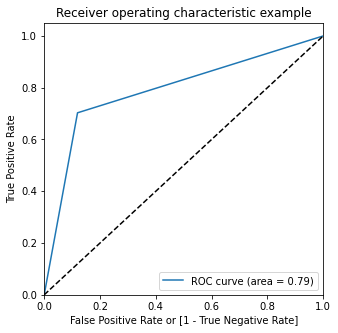

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted) 

As we can see that, The area under ROC curve is 0.79 which seems good as it lies within (0,1).

## Step 10: Finding Optimal Cutoff Point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.617042,1,1,1,1,1,1,1,1,0,0,0
1,0,0.746405,1,1,1,1,1,1,1,1,1,0,0
2,1,0.809212,1,1,1,1,1,1,1,1,1,1,0
3,0,0.097713,0,1,0,0,0,0,0,0,0,0,0
4,0,0.024373,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.389557,1.000000,0.000000
0.1,0.1,0.594620,0.982941,0.346812
0.2,0.2,0.764241,0.916734,0.666926
0.3,0.3,0.794304,0.885053,0.736392
0.4,0.4,0.810759,0.776604,0.832556
0.5,0.5,0.811392,0.703087,0.880508
0.6,0.6,0.805063,0.636881,0.912390
0.7,0.7,0.782595,0.524370,0.947382
0.8,0.8,0.748892,0.404143,0.968896
0.9,0.9,0.718038,0.296101,0.987299


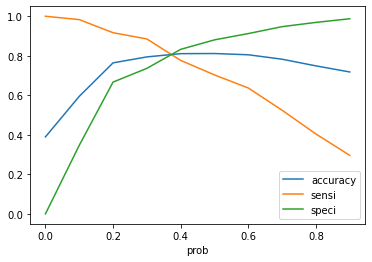

In [109]:
#Now let's plot optimal cut off
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see from the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.617042,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.746405,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.809212,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.097713,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.024373,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094936708860759

In [112]:
#Let's create confusion matrix again. 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion2

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7030869212022746

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8805080352514256

In [116]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11949196474857439


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7896897810218978


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8229166666666666


## Precision and Recall

In [119]:
#Let's look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [120]:
#Precision : TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7896897810218978

In [121]:
#Recall : TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7030869212022746

Using sklearn utilities for the same

In [122]:
from sklearn.metrics import precision_score, recall_score

In [123]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7896897810218978

In [124]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7030869212022746

## Step 11: Making predictions on the test set

In [125]:
leadInfo.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [126]:
#Let's scale numeric variables now.
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [127]:
#Let's Substitute all the columns in the final train model
col = X_train.columns

In [128]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Unreachable
2296,0,0.1875,184.375,0,0,0,0,1,0,0,0,0
8697,0,0.4375,51.000,0,0,0,0,1,0,0,0,0
7378,0,0.1250,45.250,0,0,0,0,0,0,0,0,0
8631,0,0.3125,112.875,0,0,0,0,1,0,0,0,0
4799,0,0.5000,206.375,0,0,0,0,1,0,0,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Unreachable
2296,1.0,0,0.1875,184.375,0,0,0,0,1,0,0,0,0
8697,1.0,0,0.4375,51.000,0,0,0,0,1,0,0,0,0
7378,1.0,0,0.1250,45.250,0,0,0,0,0,0,0,0,0
8631,1.0,0,0.3125,112.875,0,0,0,0,1,0,0,0,0
4799,1.0,0,0.5000,206.375,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0,0.3125,23.625,0,0,0,0,0,1,0,0,0
7783,1.0,0,0.2500,29.500,0,0,0,0,0,0,0,0,0
6255,1.0,0,0.0000,0.000,0,1,0,0,1,0,0,0,0
5390,1.0,0,0.0000,0.000,1,0,0,0,1,0,0,0,0


Making predictions on the test set

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

2296    1.000000
8697    1.000000
7378    1.000000
8631    1.000000
4799    1.000000
4503    0.336972
7129    1.000000
1717    0.113109
8398    1.000000
5116    0.316490
dtype: float64

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
# Let's see the head
y_pred_1.head()

,0
2296,1.0
8697,1.0
7378,1.0
8631,1.0
4799,1.0


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [136]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
y_pred_final.head()

,Converted,CustID,0
0,1,2296,1.0
1,0,8697,1.0
2,0,7378,1.0
3,0,8631,1.0
4,1,4799,1.0


In [140]:
#Now let's Rename this column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})

In [141]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Conversion_Probability
0,1,2296,1.0
1,0,8697,1.0
2,0,7378,1.0
3,0,8631,1.0
4,1,4799,1.0


In [142]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final

,Converted,CustID,Conversion_Probability,final_predicted
0,1,2296,1.000000,1
1,0,8697,1.000000,1
2,0,7378,1.000000,1
3,0,8631,1.000000,1
4,1,4799,1.000000,1
...,...,...,...,...
2704,0,8688,1.000000,1
2705,0,7783,1.000000,1
2706,1,6255,0.648534,1
2707,1,5390,0.934413,1


In [143]:
y_pred_final.head()

,Converted,CustID,Conversion_Probability,final_predicted
0,1,2296,1.0,1
1,0,8697,1.0,1
2,0,7378,1.0,1
3,0,8631,1.0,1
4,1,4799,1.0,1


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.48025101513473606

In [145]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[ 350, 1344],
       [  64,  951]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9369458128078818

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.2066115702479339

## Precision and Recall

In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [150]:
# Precision : TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7896897810218978

In [151]:
#Recall : TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7030869212022746

As we can see that, considering the Optimal Cut off as 0.35, Precision is 79% and Recall is 70%.

## Precision and Recall TradeOff

In [152]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Predicted, Length: 6320, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

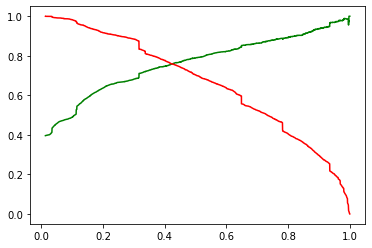

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.617042,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.746405,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.809212,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.097713,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.024373,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.48025101513473606

In [157]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion3

array([[ 350, 1344],
       [  64,  951]], dtype=int64)

In [158]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9369458128078818

In [160]:
# Let us calculate specificity
TN/float(TN+FP)

0.2066115702479339

In [161]:
# Precision = TP/TP+FP
TP/(TP+FP)

0.4143790849673203

In [162]:
#Recall = TP/TP+FN
TP/(TP+FN)

0.9369458128078818

As we can see that, we optimal cut off 0.41, Precision is around 41% and Recall is around 94%.

## Step 12: Prediction on Test set

In [163]:
#Let's store prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)

In [164]:
#Now let's convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
#Let's now remove index for both the dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,CustID,Conversion_Probability,final_predicted
0,1,2296,1.0,1
1,0,8697,1.0,1
2,0,7378,1.0,1
3,0,8631,1.0,1
4,1,4799,1.0,1


In [166]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [167]:
#Now, we need to rename column.
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0


In [168]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,1.000000,1
2,0,1.000000,1
3,0,1.000000,1
4,1,1.000000,1
...,...,...,...
2704,0,1.000000,1
2705,0,1.000000,1
2706,1,0.648534,1
2707,1,0.934413,1


In [169]:
#Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.48025101513473606

In [170]:
#confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 350, 1344],
       [  64,  951]], dtype=int64)

In [171]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [172]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.4143790849673203

In [173]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9369458128078818

As we can see that, we optimal cut off 0.41, Precision is around 41% and Recall is around 94%.

# Conclusion

As we can see that, below are the Potential leads which can be preferred to increase chances of conversion:-
1. Leads with maximum Total Visits
2. Leads with maximum Total Time Spent on website
3. Leads with Lead Source as Google
4. Leads withLast Activity as SMS
5. Leads with Current Occupation as Working Professional